# Домашнее задание 2. Нейронные сети
## Фалалеев ИУ8-83

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация библиотек

In [725]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.nn import functional, Sequential
from torch import nn
import torch
import math
import re
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, classification_report, f1_score

# 1. Искусственная неронная сеть для решения задачи регрессии (9 баллов)

## 1.1 Загрузите данные, поделить на train и test



In [688]:
data = pd.read_csv('./Car details v3.csv')

data = data.dropna()
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


## 1.2 По необходимости проведите преодбработку/нормализацию данных

In [689]:
def convert_to_float(x):
    return float(''.join(re.findall('[0-9.]+', x)))


def parseTorque(torque):
    if '/' in torque:
        return None
    torque_split = torque.split(' ')

    temp_split = torque_split[0].split('(')
    torque_nm = convert_to_float(temp_split[0])
    if torque_nm < 50:
        torque_nm *= 9.807

    if torque_split.__len__() == 2 or torque_split.__len__() == 3:
        reg_res = re.findall('[-~]', torque_split[1])
        if reg_res:
            temp_split = torque_split[1].split(reg_res[0])
            torque_rmp = (convert_to_float(temp_split[0]) + convert_to_float(temp_split[1])) / 2
        else:
            torque_rmp = convert_to_float(torque_split[1])
    elif torque_split.__len__() == 4:
        if 'at' in torque:
            pos = 2 if torque_split[1] == 'at' else 3
            reg_res = re.findall('[-~]', torque_split[pos])
            if reg_res:
                temp_split = torque_split[pos].split(reg_res[0])
                torque_rmp = (convert_to_float(temp_split[0]) + convert_to_float(temp_split[1])) / 2
            else:
                torque_rmp = convert_to_float(torque_split[pos])
        else:
            return None
    else:
        return None
    if torque_rmp > 5000:
        return None

    power = torque_nm * torque_rmp / 9.5488
    return power

data = data.dropna()

data = data.drop(['name'], axis=1)

data[['fuel',
      'seller_type',
      'transmission',
    'owner']] = data[['fuel',
                      'seller_type',
                      'transmission',
                      'owner']].apply(lambda x: pd.factorize(x)[0])


data['torque'] = data['torque'].apply(parseTorque)

to_mileage= []
for i in data.mileage:
    if str(i).endswith('km/kg'):
        i = i.split(' ')[0]
        i = float(i) * 1.40
        to_mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i.split(' ')[0]
        to_mileage.append(float(i))

data['mileage']=to_mileage

to_float_parse = lambda x: float(x.split(' ')[0])
data['max_power'] = data['max_power'].apply(to_float_parse)
data['engine'] = data['engine'].apply(to_float_parse)

data = data.dropna()
data = pd.get_dummies(data)

In [690]:

quant = np.quantile(data['fuel'], 0.55)
data = data[data['fuel']<=quant]

quant = np.quantile(data['selling_price'], 0.55)
data = data[data['selling_price']<=quant]

quant = np.quantile(data['torque'], 0.55)
data = data[data['torque']<=quant]


In [691]:

X = data.drop(['selling_price'],axis=1)
Y = data['selling_price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)


## 1.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=линейная регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое функцию активации можно не использовать.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [692]:
activation_function = nn.ReLU

In [693]:
optimization_algoritm = torch.optim.RMSprop

In [694]:
def print_loss(loss):
    print(f'Loss = {loss}')

def plot_plot(result):
    plt.yscale('Log')
    plt.plot(result)

In [695]:
def train(model, epoch_amount, alg_optimization):
    res = []
    for epoch in range(epoch_amount):

        alg_optimization.zero_grad()
        model.train()
        y_l = model.forward(torch.FloatTensor(x_train.values))
        los = functional.mse_loss(y_l[:,0], torch.FloatTensor(y_train))
        los.backward()
        alg_optimization.step()

        res.append(math.sqrt(los.item()))

        plot_plot(res)


def test(model):
    y_l = model.forward(torch.FloatTensor(x_train.values))
    los = functional.mse_loss(y_l[:,0], torch.FloatTensor(y_train))
    res = math.sqrt(los.item())
    print_loss(res)

    return res


def start_learn(model, alg_optimization, epoch_amount=1500):
    train(model, epoch_amount, alg_optimization)
    testing = test(model)
    return testing

In [696]:
def initialize(amount_of_layers, activ_func):
    model = Sequential()
    for i in range(1, amount_of_layers):
        model.add_module(f'{i}-й слой ', torch.nn.Linear(11, 11))
        model.add_module(f'{i}-я активация', activ_func)
    model.add_module(f'{amount_of_layers}-й слой', torch.nn.Linear(11, 1))
    return model


In [697]:
# 1 layer
model = initialize(1, activation_function)

/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 98398.50665533498


98398.50665533498

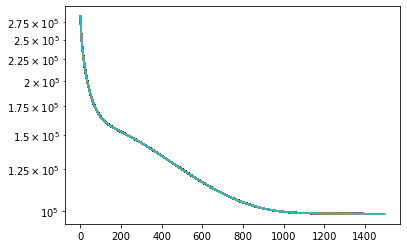

In [698]:

start_learn(model, optimization_algoritm(params=model.parameters()))


/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 94020.04620292419


94020.04620292419

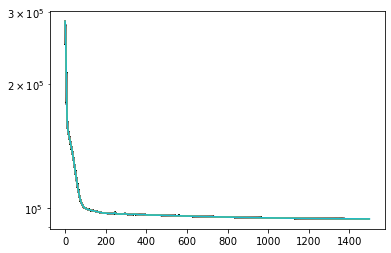

In [699]:
# 2 layers
model = initialize(2, activation_function())

start_learn(model, optimization_algoritm(params=model.parameters()))


/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 94415.85222832022


94415.85222832022

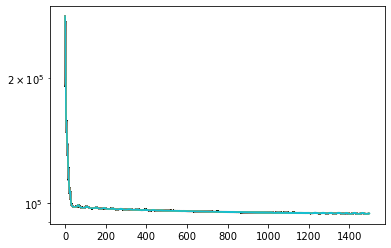

In [700]:
# 3 layers
model = initialize(3, activation_function())

start_learn(model, optimization_algoritm(params=model.parameters()))


/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 94912.32366768816


94912.32366768816

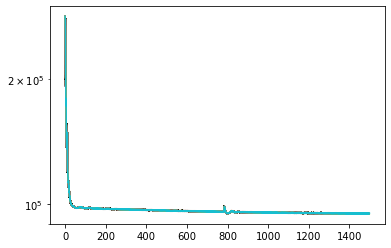

In [701]:
# 4 layers
model = initialize(4, activation_function())

start_learn(model, optimization_algoritm(params=model.parameters()))


## 1.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации: sigmoid, tanh, ReLU, ELU. 

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 282092.4421532771


282092.4421532771

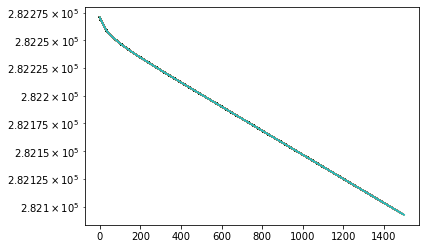

In [702]:
model = initialize(4, nn.Sigmoid())

start_learn(model, optimization_algoritm(params=model.parameters()))


/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 282092.529273641


282092.529273641

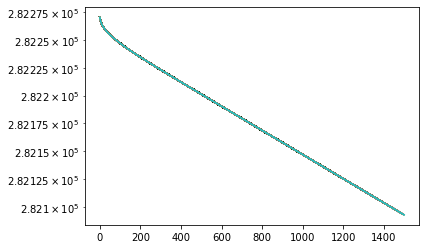

In [703]:
model = initialize(4, nn.Tanh())

start_learn(model, optimization_algoritm(params=model.parameters()))


/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 95644.33850469143


95644.33850469143

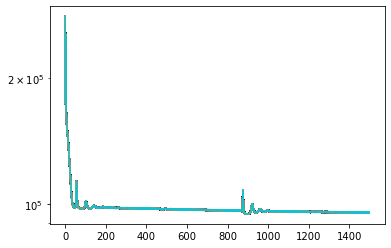

In [704]:
model = initialize(4, nn.ReLU())

start_learn(model, optimization_algoritm(params=model.parameters()))


/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 94998.51485154913


94998.51485154913

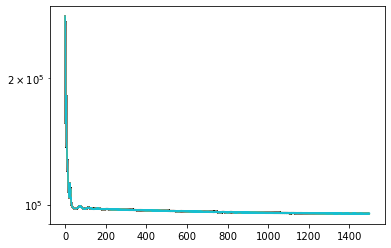

In [705]:
model = initialize(4, nn.ELU())

start_learn(model, optimization_algoritm(params=model.parameters()))


/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 281629.52572484297


281629.52572484297

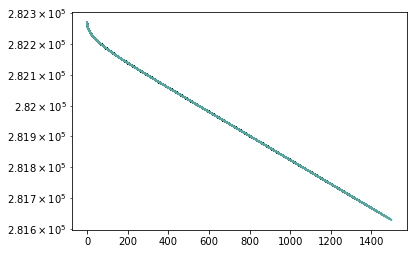

In [706]:
model = initialize(4, nn.ReLU6())

start_learn(model, optimization_algoritm(params=model.parameters()))


## 1.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = nan


nan

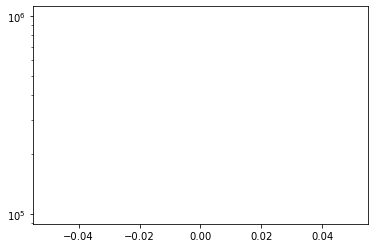

In [707]:
model = initialize(4, activation_function())

start_learn(model, torch.optim.SGD(params=model.parameters(), lr=0.1))

/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = nan


nan

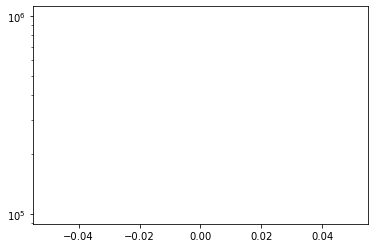

In [708]:
model = initialize(4, activation_function())

start_learn(model, torch.optim.SGD(params=model.parameters(), lr=0.1, momentum=0.7))

/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 94753.1725695768


94753.1725695768

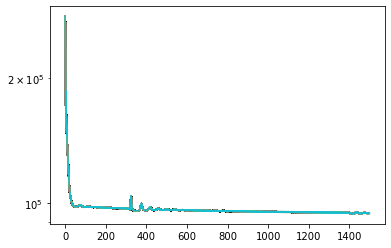

In [709]:
model = initialize(4, activation_function())

start_learn(model, torch.optim.RMSprop(params=model.parameters()))

/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 96270.98819478275


96270.98819478275

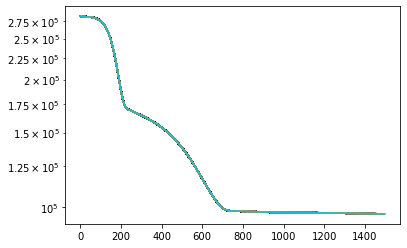

In [710]:
model = initialize(4, activation_function())

start_learn(model, torch.optim.Adam(params=model.parameters()))

## 1.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

In [711]:

def initialize16(amount_of_layers, activ_func, batch_norm, dropout, dropout_p):
    model = Sequential()

    for i in range(1, amount_of_layers):
        model.add_module(f'{i}-й слой ', torch.nn.Linear(11, 11))
        model.add_module(f'{i}-я активация', activ_func)
        if batch_norm:
            model.add_module('batchNorm ON', nn.BatchNorm1d(11))
        if dropout:
            model.add_module('dropout ON', nn.Dropout(p=dropout_p))

    model.add_module(f'{amount_of_layers}-й слой', torch.nn.Linear(11, 1))
    return model

/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 273018.62910797866


273018.62910797866

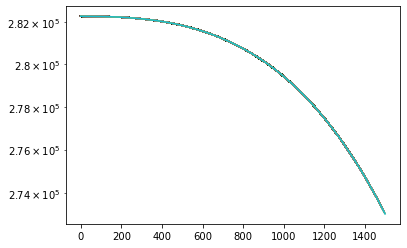

In [712]:
model = initialize16(4, nn.ReLU(), True, False, 0.0)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.001))

/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 99374.53549073827


99374.53549073827

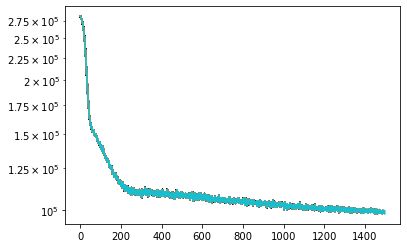

In [713]:
model = initialize16(4, nn.ReLU(), False, True, 0.2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.001))

/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 106803.45043115414


106803.45043115414

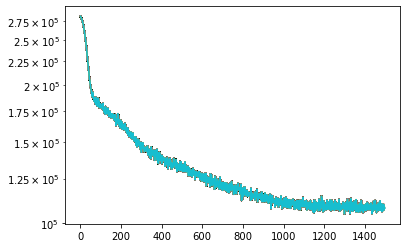

In [714]:
model = initialize16(4, nn.ReLU(), False, True, 0.5)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.001))

/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 268142.52544495807


268142.52544495807

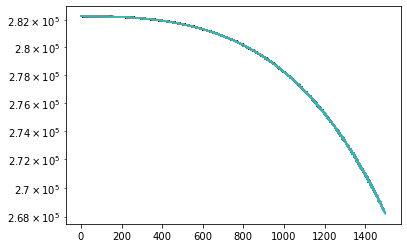

In [715]:
model = initialize16(4, nn.ReLU(), True, True, 0.2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.001))

/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 267835.725652871


267835.725652871

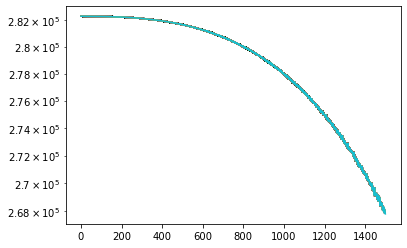

In [716]:
model = initialize16(4, nn.ReLU(), True, True, 0.5)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.001))

## 1.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

/var/folders/t1/n901bydx7jn8cbt6w20d0m_h0000gn/T/ipykernel_4123/1765134461.py:5: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


Loss = 95672.75959226847


95672.75959226847

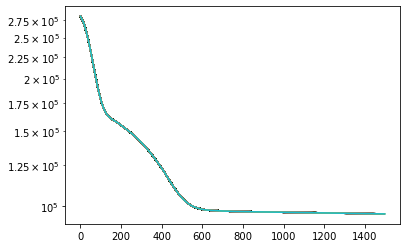

In [717]:
model = initialize(3, nn.ReLU())
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.001))

## 1.8 Выводы

*Прекрасная жизнь начинается с ваших прекрасных мыслей:*
Оптимальные параметры:
- 3 слоя
- RMSprop
- ReLU

# 2. Искусственная неронная сеть для решения задачи классификации (9 баллов)

## 2.1 Загрузите данные, поделить на train и test



In [953]:
data = pd.read_csv('diabetes.csv')

data = data.dropna()
for i in list(data.columns.values):
    if i == 'Outcome':
        break
    data = data[data[i] != 0]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [954]:
X = data.drop(columns='Outcome', axis=1)
Y = data['Outcome']

In [955]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

## 2.2 По необходимости проведите преодбработку/нормализацию данных

## 2.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=логистическая регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [956]:
def train(model, alg_optimization, los_func, epoch_amount):
    los_train = []
    los_test = []

    ac_train = []
    ac_test = []

    for epoch in range(epoch_amount):

        alg_optimization.zero_grad()
        model.train()


        y_l_test = model.forward(torch.FloatTensor(x_test.values))
        los_test.append(los_func(y_l_test, torch.LongTensor(y_test.values)).item())
        ac_test.append(accuracy_score(y_test, np.argmax(y_l_test.detach().numpy(), axis=1)))

        y_l = model.forward(torch.FloatTensor(x_train.values))
        los = los_func(y_l, torch.LongTensor(y_train.values))
        ac_train.append(accuracy_score(y_train, np.argmax(y_l.detach().numpy(), axis=1)))


        los.backward()
        alg_optimization.step()

        los_train.append(los.item())

    plt.plot(los_train)
    plt.plot(los_test)
    plt.yscale('log')
    plt.show()

    plt.plot(ac_train)
    plt.plot(ac_test)
    plt.yscale('log')
    plt.show()

def test(model, functional):
    y_l = model.forward(torch.FloatTensor(x_test.values))
    los = functional(y_l, torch.LongTensor(y_test.values))

    y_l_t = np.argmax(y_l.detach().numpy(), axis=1)
    score = round(f1_score(y_test, y_l_t, average='macro'), 4)

    print(classification_report(y_test, y_l_t, zero_division=0))
    print(f'f1_score: {score} ')

    return score


def start_learn(model, alg_optimization, functional=functional.nll_loss, epoch_amount=1500):
    train(model, alg_optimization, functional, epoch_amount)
    testing = test(model, functional)
    return testing

In [957]:
def initialize(amount_of_layers, activ_func, in_, out_):
    model = Sequential()

    for i in range(1, amount_of_layers):
        model.add_module(f'{i}-й слой ', torch.nn.Linear(in_, in_))
        model.add_module(f'{i}-я активация', activ_func)

    model.add_module(f'{amount_of_layers}-й слой', torch.nn.Linear(in_, out_))
    model.add_module('финальная активация', nn.LogSoftmax(dim=1))

    return model

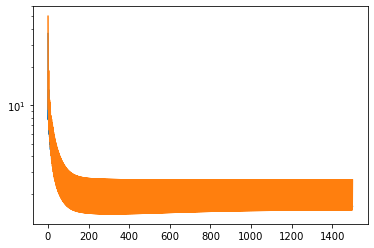

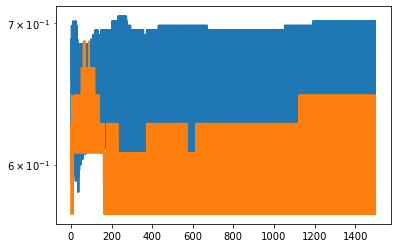

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.56      0.82      0.67        22

    accuracy                           0.65        51
   macro avg       0.68      0.67      0.65        51
weighted avg       0.69      0.65      0.64        51

f1_score:  0.6458


0.6458

In [958]:
model = initialize(1, nn.ReLU(), 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

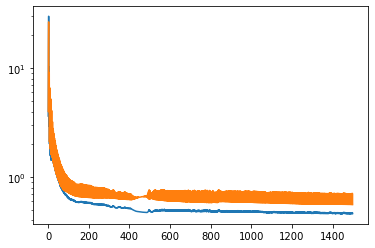

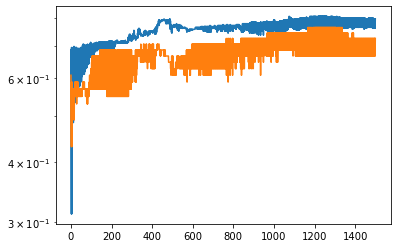

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        29
           1       1.00      0.23      0.37        22

    accuracy                           0.67        51
   macro avg       0.82      0.61      0.57        51
weighted avg       0.79      0.67      0.60        51

f1_score:  0.5719


0.5719

In [959]:
model = initialize(2, nn.ReLU(), 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

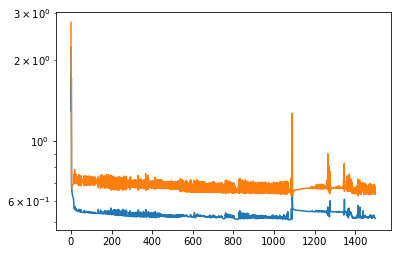

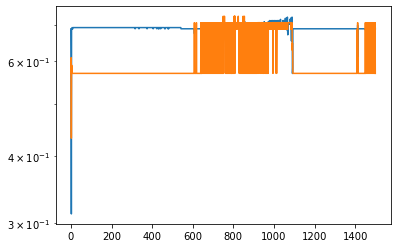

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.64      0.73      0.68        22

    accuracy                           0.71        51
   macro avg       0.70      0.71      0.70        51
weighted avg       0.71      0.71      0.71        51

f1_score:  0.7041


0.7041

In [960]:
model = initialize(3, nn.ReLU(), 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

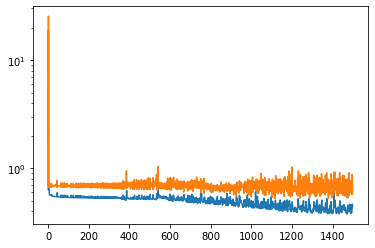

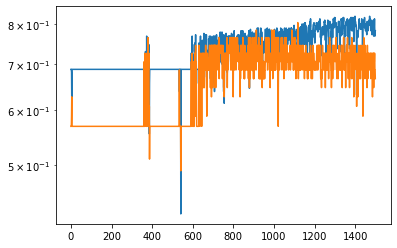

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        29
           1       0.79      0.50      0.61        22

    accuracy                           0.73        51
   macro avg       0.74      0.70      0.70        51
weighted avg       0.74      0.73      0.71        51

f1_score:  0.6995


0.6995

In [961]:
model = initialize(4, nn.ReLU(), 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

## 2.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации на промежуточных слоях: sigmoid, tanh, ReLU, ELU. На выходном слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

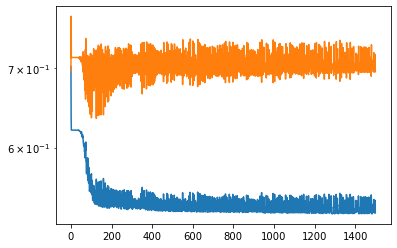

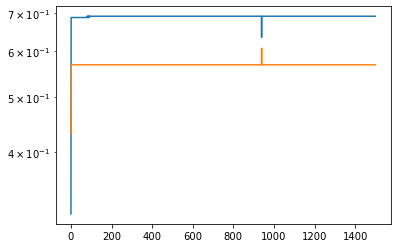

              precision    recall  f1-score   support

           0       0.57      1.00      0.72        29
           1       0.00      0.00      0.00        22

    accuracy                           0.57        51
   macro avg       0.28      0.50      0.36        51
weighted avg       0.32      0.57      0.41        51

f1_score:  0.3625


0.3625

In [962]:
model = initialize(4, nn.Sigmoid(), 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

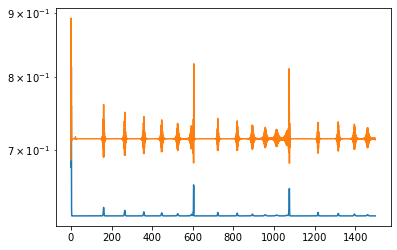

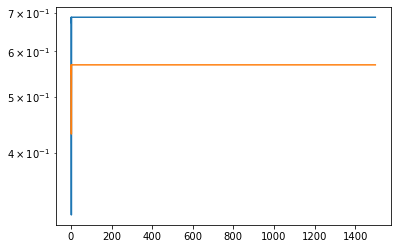

              precision    recall  f1-score   support

           0       0.57      1.00      0.72        29
           1       0.00      0.00      0.00        22

    accuracy                           0.57        51
   macro avg       0.28      0.50      0.36        51
weighted avg       0.32      0.57      0.41        51

f1_score:  0.3625


0.3625

In [963]:
model = initialize(4, nn.Tanh(), 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

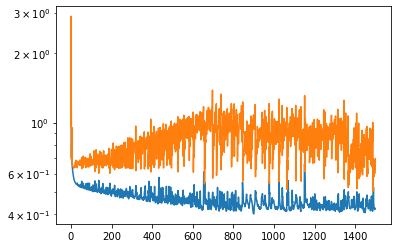

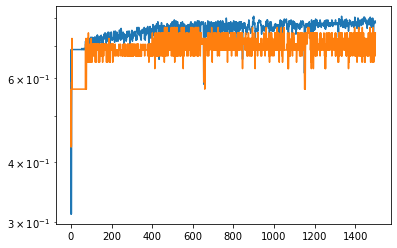

              precision    recall  f1-score   support

           0       0.75      0.72      0.74        29
           1       0.65      0.68      0.67        22

    accuracy                           0.71        51
   macro avg       0.70      0.70      0.70        51
weighted avg       0.71      0.71      0.71        51

f1_score:  0.7018


0.7018

In [964]:
model = initialize(4, nn.ReLU(), 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

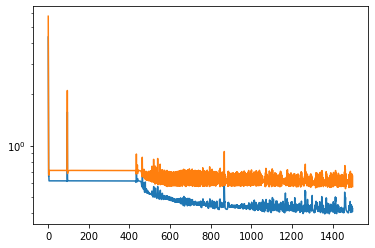

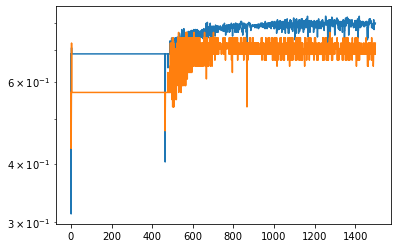

              precision    recall  f1-score   support

           0       0.67      0.97      0.79        29
           1       0.89      0.36      0.52        22

    accuracy                           0.71        51
   macro avg       0.78      0.66      0.65        51
weighted avg       0.76      0.71      0.67        51

f1_score:  0.6524


0.6524

In [965]:
model = initialize(4, nn.ELU(), 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

## 2.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

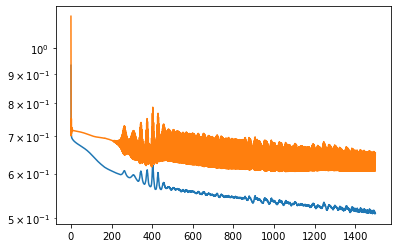

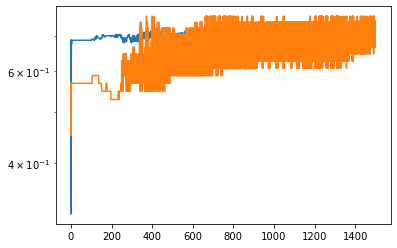

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.73      0.73      0.73        22

    accuracy                           0.76        51
   macro avg       0.76      0.76      0.76        51
weighted avg       0.76      0.76      0.76        51

f1_score:  0.7602


0.7602

In [966]:
model = initialize(4, nn.ReLU(), 8, 2)
start_learn(model, torch.optim.SGD(model.parameters(), lr=0.01))

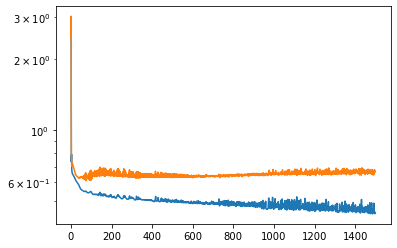

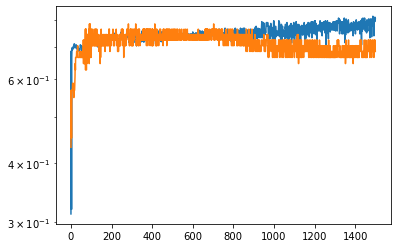

              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.62      0.68      0.65        22

    accuracy                           0.69        51
   macro avg       0.68      0.69      0.68        51
weighted avg       0.69      0.69      0.69        51

f1_score:  0.6832


0.6832

In [967]:
model = initialize(4, nn.ReLU(), 8, 2)
start_learn(model, torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.23))

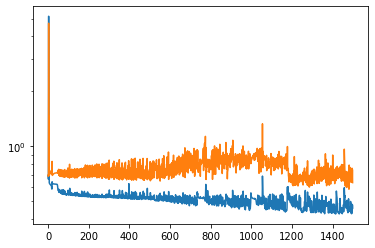

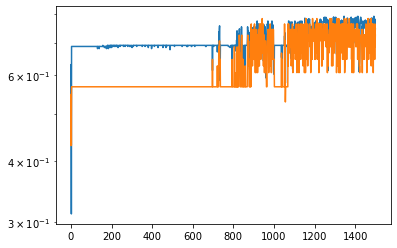

              precision    recall  f1-score   support

           0       0.71      0.59      0.64        29
           1       0.56      0.68      0.61        22

    accuracy                           0.63        51
   macro avg       0.63      0.63      0.63        51
weighted avg       0.64      0.63      0.63        51

f1_score:  0.6269


0.6269

In [968]:
model = initialize(4, nn.ReLU(), 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

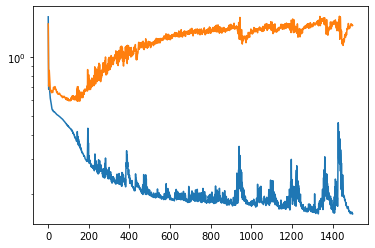

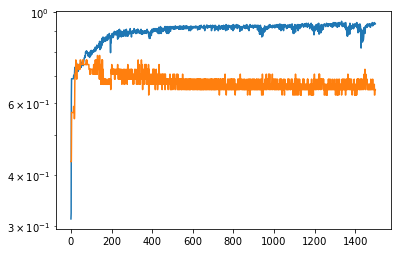

              precision    recall  f1-score   support

           0       0.64      0.86      0.74        29
           1       0.67      0.36      0.47        22

    accuracy                           0.65        51
   macro avg       0.65      0.61      0.60        51
weighted avg       0.65      0.65      0.62        51

f1_score:  0.6029


0.6029

In [969]:
model = initialize(4, nn.ReLU(), 8, 2)
start_learn(model, torch.optim.Adam(model.parameters(), lr=0.01))

## 2.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

In [970]:
def initialize26(amount_of_layers, activ_func, batch_norm, dropout, dropout_p, in_, out_):
    model = Sequential()

    for i in range(1, amount_of_layers):
        model.add_module(f'{i}-й слой ', torch.nn.Linear(in_, in_))
        model.add_module(f'{i}-я активация', activ_func)
        if batch_norm:
            model.add_module('batchNorm ON', nn.BatchNorm1d(in_))
        if dropout:
            model.add_module('dropout ON', nn.Dropout(p=dropout_p))

    model.add_module(f'{amount_of_layers}-й слой', torch.nn.Linear(in_, out_))
    model.add_module('финальная активация', nn.LogSoftmax(dim=1))
    return model

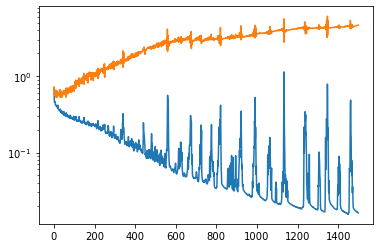

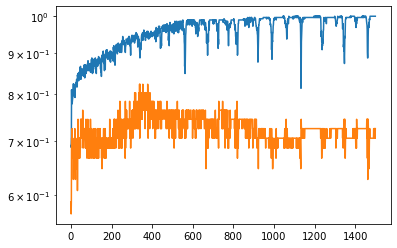

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        29
           1       0.79      0.50      0.61        22

    accuracy                           0.73        51
   macro avg       0.74      0.70      0.70        51
weighted avg       0.74      0.73      0.71        51

f1_score:  0.6995


0.6995

In [971]:
model = initialize26(4, nn.ReLU(), True, False, 0.0, 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

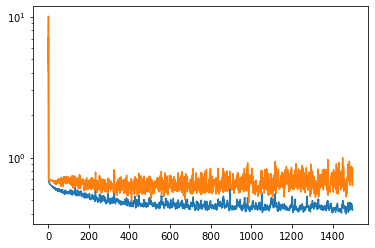

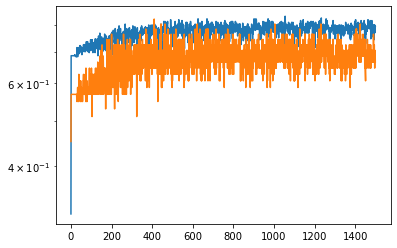

              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.62      0.59      0.60        22

    accuracy                           0.67        51
   macro avg       0.66      0.66      0.66        51
weighted avg       0.67      0.67      0.67        51

f1_score:  0.6583


0.6583

In [972]:
model = initialize26(4, nn.ReLU(), False, True, 0.2, 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

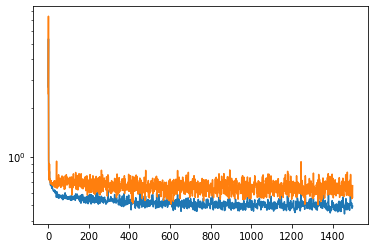

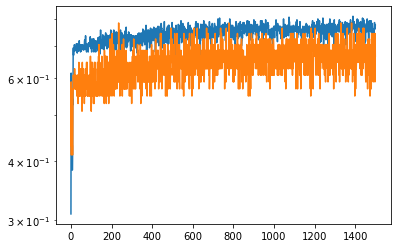

              precision    recall  f1-score   support

           0       0.67      0.90      0.76        29
           1       0.75      0.41      0.53        22

    accuracy                           0.69        51
   macro avg       0.71      0.65      0.65        51
weighted avg       0.70      0.69      0.66        51

f1_score:  0.6471


0.6471

In [973]:
model = initialize26(4, nn.ReLU(), False, True, 0.5, 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

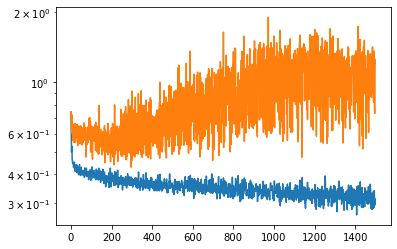

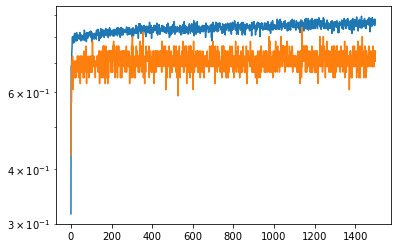

              precision    recall  f1-score   support

           0       0.69      0.93      0.79        29
           1       0.83      0.45      0.59        22

    accuracy                           0.73        51
   macro avg       0.76      0.69      0.69        51
weighted avg       0.75      0.73      0.71        51

f1_score:  0.6912


0.6912

In [974]:
model = initialize26(4, nn.ReLU(), True, True, 0.2, 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

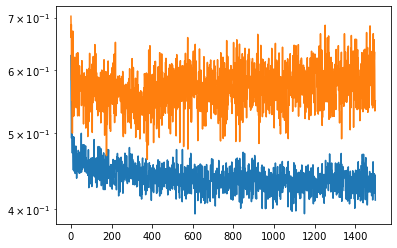

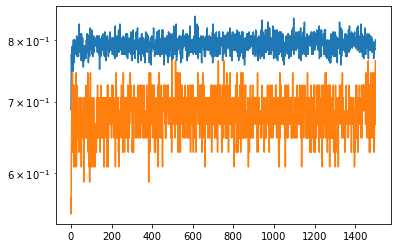

              precision    recall  f1-score   support

           0       0.64      0.97      0.77        29
           1       0.86      0.27      0.41        22

    accuracy                           0.67        51
   macro avg       0.75      0.62      0.59        51
weighted avg       0.73      0.67      0.61        51

f1_score:  0.5905


0.5905

In [975]:
model = initialize26(4, nn.ReLU(), True, True, 0.5, 8, 2)
start_learn(model, torch.optim.RMSprop(model.parameters(), lr=0.01))

## 2.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

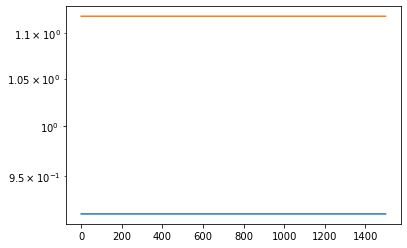

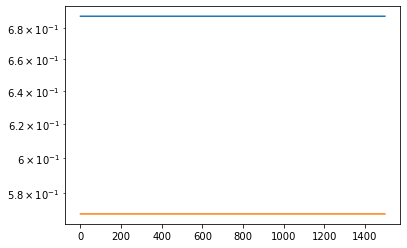

              precision    recall  f1-score   support

           0       0.57      1.00      0.72        29
           1       0.00      0.00      0.00        22

    accuracy                           0.57        51
   macro avg       0.28      0.50      0.36        51
weighted avg       0.32      0.57      0.41        51

f1_score:  0.3625


0.3625

In [976]:
modelf = initialize(4, nn.ReLU(), 8, 2)
start_learn(modelf, torch.optim.RMSprop(model.parameters(), lr=0.01))

In [ ]:
# если посмотреть пункт 2.5 там значение >= baseline

## 2.8 Выводы

*Your beautiful thoughts:*